In [3]:
import json
import pandas as pd
import numpy as np
import re

In [4]:
file_dir = 'C:/User/TTHammond/desktop/modules/Movies-ETL'

In [5]:
with open(f'wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [6]:
len(wiki_movies_raw)

7311

In [7]:
wiki_movies_raw[3600:3605]
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [8]:
kaggle_metadata = pd.read_csv(f'movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'ratings.csv')

In [9]:
len(kaggle_metadata.sample(frac=.001))

45

In [10]:
kaggle_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [11]:
wiki_movies = [movie for movie in wiki_movies_raw if ('Director' or "Directed by" in movie) and 'imdb_link' in movie and 'No. of episodes' not in movie]


In [12]:
def clean_movie(movie):
    movie = dict(movie) 
    #create a non-destructive copy
    return movie

In [13]:
wiki_movies_df[wiki_movies_df.notnull()['Arabic']]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [14]:
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [15]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    return movie

In [16]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [17]:
wiki_movies_df = pd.DataFrame(clean_movies)

In [18]:
def clean_movie(movie):
    movie = dict(movie) #creates a non-destructive copy
    alt_titles = {}
    # combines alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merges column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Runtime')
    change_column_name('Original release', 'Release Date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production Company(ies)')
    change_column_name('Productioncompany ', 'Production Company(ies)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release Date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [19]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [20]:
wiki_movies_df = pd.DataFrame(clean_movies)

In [21]:
print(len(wiki_movies_df))

7094


In [22]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

In [23]:
wiki_movies_df.drop_duplicates(subset='imdb_id',inplace=True)

In [24]:
print(len(wiki_movies_df))

7049


In [25]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 5],
 ['Based on', 4867],
 ['Starring', 198],
 ['Narrated by', 6767],
 ['Cinematography', 707],
 ['Release date', 204],
 ['Running time', 152],
 ['Country', 244],
 ['Language', 252],
 ['Budget', 2312],
 ['Box office', 1565],
 ['Director', 17],
 ['Distributor', 373],
 ['Editor(s)', 565],
 ['Composer(s)', 534],
 ['Producer(s)', 215],
 ['Production Company(ies)', 1825],
 ['Writer(s)', 213],
 ['Genre', 6932],
 ['Original language(s)', 6891],
 ['Production company(s)', 6918],
 ['Original network', 6924],
 ['Release Date', 6886],
 ['Executive producer(s)', 6952],
 ['Production location(s)', 7002],
 ['Picture format', 6985],
 ['Audio format', 6988],
 ['Voices of', 7047],
 ['Followed by', 7038],
 ['Created by', 7037],
 ['Preceded by', 7037],
 ['Author', 7045],
 ['Publisher', 7045],
 ['Publication date', 7045],
 ['Media type', 7046],
 ['Pages', 7047],
 ['ISBN', 7047],
 ['OCLC', 7047],
 ['LC Class', 7048],
 ['Cover artist', 7048],
 ['Series

In [26]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [27]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)',
       'Composer(s)', 'Producer(s)', 'Production Company(ies)', 'Writer(s)',
       'imdb_id'],
      dtype='object')

In [28]:
print(len(wiki_movies_df.columns))

21


In [29]:
wiki_movies_df.dtypes


url                        object
year                        int64
imdb_link                  object
title                      object
Based on                   object
Starring                   object
Cinematography             object
Release date               object
Running time               object
Country                    object
Language                   object
Budget                     object
Box office                 object
Director                   object
Distributor                object
Editor(s)                  object
Composer(s)                object
Producer(s)                object
Production Company(ies)    object
Writer(s)                  object
imdb_id                    object
dtype: object

In [30]:
box_office = wiki_movies_df['Box office'].dropna()

In [31]:
len(box_office)

5484

In [32]:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]    

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6998               [$99.6, million, [4], [5]]
7012                   [$365.6, million, [1]]
7013                         [$53.8, million]
7033                     [$435, million, [7]]
7066                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [33]:
#using lambda function to refactor code
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6998               [$99.6, million, [4], [5]]
7012                   [$365.6, million, [1]]
7013                         [$53.8, million]
7033                     [$435, million, [7]]
7066                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [34]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)


In [35]:
# establishes box office return forms for RE as $XXX.X million"
form_one = r'\$\d+\.\d*\s*[mb]illion'

In [38]:
# counts number of forms = to form_two
box_office.str.contains(form_one, flags = re.IGNORECASE, na = False).sum()

3318

In [39]:
# establishes box office return forms for RE as "$XXX,XXX,XXX"
form_two = r'\$\d{1,3}(?:,\d{3})+'
# counts number of forms = to form_two
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [40]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [42]:
# this will throw an error! - (Doesn't use correct element-wise logical operators)
box_office[(not matches_form_one) and (not matches_form_two)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
box_office[~matches_form_one & ~matches_form_two]

29         $5 million
34      US$ 4,212,828
58       $240 million
64        $86 million
66        $25 million
            ...      
7053     $174 million
7064      $76 million
7069     $323 million
7074      $43 million
7085     $468 million
Name: Box office, Length: 623, dtype: object

In [46]:
# adjust forms to capture exceptions (like extra spaces, period & commas as separators, etc.)
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [47]:
#Deal with ranges and convert to non-range values (Note the different hyphen and dashes)
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [48]:
# deal with Million mispelling as millon
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [49]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [58]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [59]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7089    41900000.0
7090    76100000.0
7091    38400000.0
7092     5500000.0
7093           NaN
Name: box_office, Length: 7049, dtype: float64

In [60]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [62]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Director', 'Distributor', 'Editor(s)', 'Composer(s)',
       'Producer(s)', 'Production Company(ies)', 'Writer(s)', 'imdb_id',
       'box_office'],
      dtype='object')

In [66]:

budget = wiki_movies_df['Budget'].dropna()
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [67]:
# parse the box office data and apply matches without modifying budget data.
matches_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_one & ~matches_two]

136                         Unknown
205     60 million Norwegian Kroner
482                         Unknown
979             $34 [3] [4] million
1133               $120 [4] million
1233                        Unknown
1286                            HBO
1382                     £6,000,000
1406                     13 million
1489                   £2.8 million
1746                   CAD2,000,000
1925     PHP 85 million (estimated)
1960                    102,888,900
1965                   3,500,000 DM
1985                     ₤2,300,874
2295                     $14 milion
2465                     ₤6,350,000
3158                   € 40 million
3374               $150 [6] million
3432                        $218.32
3816                   £4.2 million
3920                            N/A
3973                    760,000 USD
4485                       19 crore
4657                    £17 million
5050              $$200 [4] million
5071           $155 [2] [3] million
5435                $40 [4] 

In [69]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_one & ~matches_two]

136                         Unknown
205     60 million Norwegian Kroner
482                         Unknown
979                     $34 million
1133                   $120 million
1233                        Unknown
1286                            HBO
1382                     £6,000,000
1406                     13 million
1489                   £2.8 million
1746                   CAD2,000,000
1925     PHP 85 million (estimated)
1960                    102,888,900
1965                   3,500,000 DM
1985                     ₤2,300,874
2295                     $14 milion
2465                     ₤6,350,000
3158                   € 40 million
3374                   $150 million
3432                        $218.32
3816                   £4.2 million
3920                            N/A
3973                    760,000 USD
4485                       19 crore
4657                    £17 million
5050                  $$200 million
5071                   $155 million
5435                    $40 

In [70]:
# extracts form matches into new budget column, drop inplace the OG budget column
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})',flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [71]:
# check columns for fun
wiki_movies_df.columns


Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production Company(ies)', 'Writer(s)', 'imdb_id', 'box_office',
       'budget'],
      dtype='object')

In [77]:
 #var to hold non-null values of Release in df
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x:' '.join(x) if type(x) == list else x)
date_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_two = r'\d{4}.[01]\d.[0123]\d'
date_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_four = r'\d{4}'

In [78]:
# extract dates
release_date.str.extract(f'({date_one}|{date_two}|{date_three}|{date_four})', flags=re.IGNORECASE)


,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7089,"December 25, 2018"
7090,"December 11, 2018"
7091,"November 8, 2018"
7092,"August 31, 2018"


In [80]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_one}|{date_two}|{date_three}|{date_four})')[0], infer_datetime_format=True)

In [82]:
#var to hold non-null values for Runing time
runtime = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
#test for 'XXX minutes' type
runtime.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()


6532

In [85]:
runtime[runtime.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]


9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6518       114 minutes [1] 120 minutes (extended edition)
6661                                             104 mins
6727    90 minutes (theatrical) [1] 91 minutes (unrate...
7075    108 minutes (Original cut) 98 minutes (UK cut)...
7093                Variable; 90 minutes for default path
Name: Running time, Length: 365, dtype: object

In [86]:
# seach for runtimes starting with 'm' in abbreviation for minutes
runtime.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()


6880

In [89]:
# entries with other abbreviations
runtime[runtime.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]



637                                                  3:52
674                     UK:84 min (DVD version) US:86 min
733                         78-102 min (depending on cut)
846                       Varies (79 [3] –84 [1] minutes)
1452    United States: 77 minutes Argentina: 94 minute...
1508                                            1hr 35min
1560                                               varies
1786                    Netherlands:96 min, Canada:95 min
1789                                       approx. 14 min
2287                                           1 h 43 min
3007                                               1h 48m
3939                                              4 hours
4439    US domestic version: 86 minutes Original versi...
4983    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5440                    115 [1] /123 [2] /128 [3] minutes
5463                                    1 hour 32 minutes
7093                Variable; 90 minutes for default path
Name: Running 

In [90]:
# len top confirm # of captures
len(runtime[runtime.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True])

17

In [102]:
#capture remaining 17 runtime entries - Same pattern as above
runtime_extract = runtime.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
runtime_extract = runtime_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
wiki_movies_df['runtime'] = runtime_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)


KeyError: "['Running time'] not found in axis"

In [103]:
kaggle_metadata.dtypes

belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [100]:
kaggle_metadata['adult'].value_counts()

KeyError: 'adult'

In [101]:
# find erroneous adult enrtries
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

KeyError: 'adult'

In [98]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')


KeyError: 'adult'

In [104]:
#count values in video column
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [105]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [106]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [108]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')


In [109]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [111]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [112]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [113]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

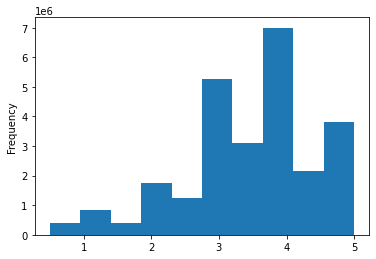

In [114]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()